In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
import matplotlib as mpl
import matplotlib.pyplot as plt

import os;
path="/Users/maurizio/repoSW/covid/covidtrends-data/data"
os.chdir(path)
os.getcwd()

#Variables
covindexV1Array=np.genfromtxt("covindex/covindex_2021-03-28_v1.csv", delimiter=",",skip_header=True)[:,1]
covindexV2Array=np.genfromtxt("covindex/covindex_2021-03-28_v2.csv", delimiter=",",skip_header=True)[:,1]
rtArray=np.genfromtxt("rt-italia/rt-italia-2021-03-24.csv", delimiter=",",skip_header=True)[:,1]

In [2]:
MAX_SIZE=len(rtArray)-10
START=0

In [3]:
def corrByLag(covindex,lag):
    return np.corrcoef(covindex[START-lag:MAX_SIZE-lag], rtArray[START:MAX_SIZE])[:1][0][1]

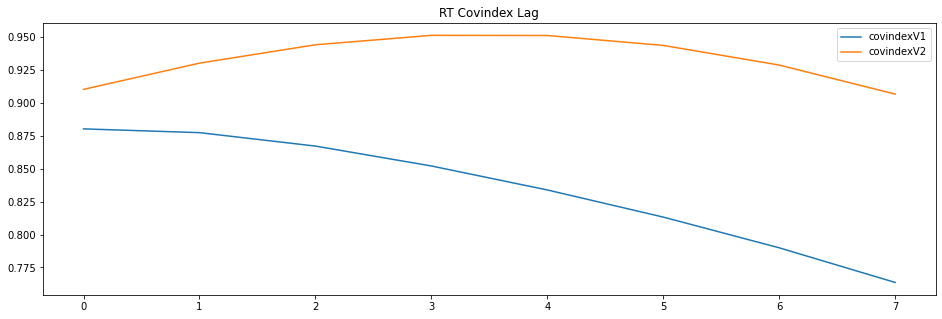

In [11]:
plt.plot(list(map((lambda x: corrByLag(covindexV1Array,-x)), range(0,8))),label='covindexV1')
plt.plot(list(map((lambda x: corrByLag(covindexV2Array,-x)), range(0,8))),label='covindexV2')
plt.title("RT Covindex Lag")
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

# Time shift for max correlation is 4 day 

In [15]:
TIME_SHIFT=-4

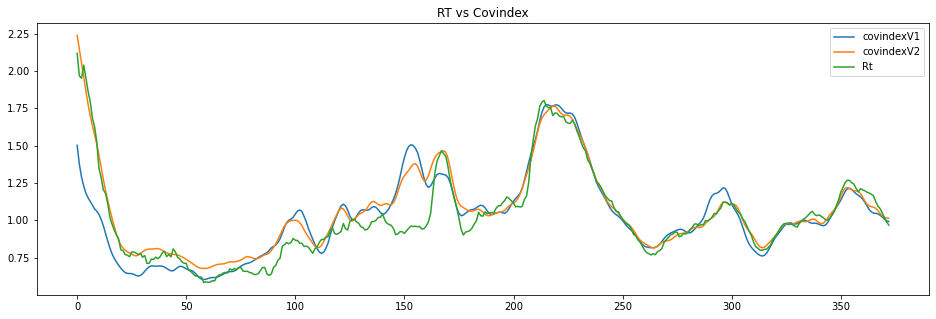

In [16]:
from scipy.ndimage.interpolation import shift
from matplotlib.pyplot import figure

plt.plot(covindexV1Array[START-TIME_SHIFT:MAX_SIZE-TIME_SHIFT],label='covindexV1')
plt.plot(covindexV2Array[START-TIME_SHIFT:MAX_SIZE-TIME_SHIFT],label='covindexV2')
plt.plot(rtArray[START:MAX_SIZE],label='Rt')
plt.title("RT vs Covindex")
#plt.ylim(0, 3)
plt.rcParams["figure.figsize"] = (16,5)
plt.legend()
plt.show()

# Correlation Index on all time

In [21]:
START=0

In [22]:
print('Correlation Index Rt vs CovindexV1:',"%.2f" % corrByLag(covindexV1Array,TIME_SHIFT))

Correlation Index Rt vs CovindexV1: 0.83


In [23]:
print('Correlation Index Rt vs CovindexV2:',"%.2f" % corrByLag(covindexV2Array,TIME_SHIFT))

Correlation Index Rt vs CovindexV2: 0.95


# Correlation Index in the last months

In [24]:
START=200

In [25]:
print('Correlation Index Rt vs CovindexV1:',"%.2f" % corrByLag(covindexV1Array,TIME_SHIFT))

Correlation Index Rt vs CovindexV1: 0.98


In [26]:
print('Correlation Index Rt vs CovindexV2:',"%.2f" % corrByLag(covindexV2Array,TIME_SHIFT))

Correlation Index Rt vs CovindexV2: 0.99
